We will be using the networkx package in Python.

Let us look at some common things that can be done with the Networkx package. These include importing and creating a Graph and ways to visualize it.

# Graph Creation


In [1]:
import networkx as nx

# Creating a Graph 
G = nx.Graph() # Right now G is empty

# Add a node
G.add_node(1) 
G.add_nodes_from([2,3]) # You can also add a list of nodes by passing a list argument

# Add edges 
G.add_edge(1,2)

e = (2,3)
G.add_edge(*e) # * unpacks the tuple
G.add_edges_from([(1,2), (1,3)]) # Just like nodes we can add edges from a list

Node and Edge attributes can be added along with the creation of Nodes and Edges by passing a tuple containing node and attribute dict.

In addition to constructing graphs node-by-node or edge-by-edge, they can also be generated by applying classic graph operations, such as:
* subgraph(G, nbunch)      - induced subgraph view of G on nodes in nbunch
* union(G1,G2)             - graph union
* disjoint_union(G1,G2)    - graph union assuming all nodes are different
* cartesian_product(G1,G2) - return Cartesian product graph
* compose(G1,G2)           - combine graphs identifying nodes common to both
* complement(G)            - graph complement
* create_empty_copy(G)     - return an empty copy of the same graph class
* convert_to_undirected(G) - return an undirected representation of G
* convert_to_directed(G)   - return a directed representation of G

Separate classes exist for different types of Graphs. For example the nx.DiGraph() class allows you to create a Directed Graph. Specific graphs containing paths can be created directly using a single method. For a full list of Graph creation methods please refer to the full documentation. 
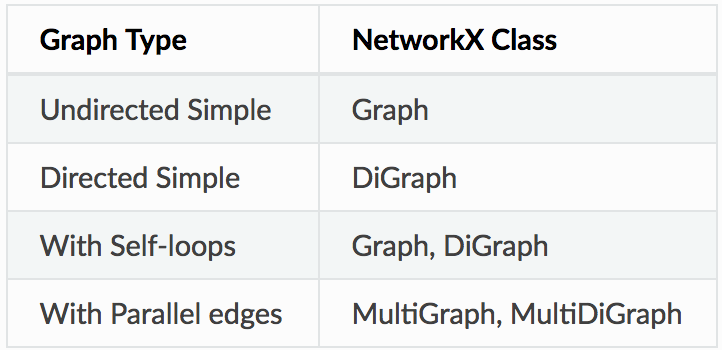

# Accessing edges and nodes


Nodes and Edges can be accessed together using the G.nodes() and G.edges() methods. Individual nodes and edges can be accessed using the bracket/subscript notation.

In [2]:
G.nodes()

NodeView((1, 2, 3))

In [3]:
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3)])

In [ ]:
G[1] # same as G.adj[1]


In [ ]:
G[1][2]

In [ ]:
G.edges[1, 2]


**Spend some solid time to check the HUGE list of functions provided in the module**

In [ ]:
dir(nx)

# Graph Visualization


Networkx provides basic functionality for visualizing graphs, but its main goal is to enable graph analysis rather than perform graph visualization. Graph visualization is hard and we will have to use specific tools dedicated for this task. Matplotlib offers some convenience functions.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(G)

Install Graphviz

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

In [ ]:
import pygraphviz as pgv
d={'1': {'2': None}, '2': {'1': None, '3': None}, '3': {'1': None}}
A = pgv.AGraph(data=d)
print(A) # This is the 'string' or simple representation of the Graph

PyGraphviz provides great control over the individual attributes of the edges and nodes. We can get very beautiful visualizations using it.

In [ ]:
from google.colab.patches import cv2_imshow
# Let us create another Graph where we can individually control the colour of each node
B = pgv.AGraph()

# Setting node attributes that are common for all nodes 
B.node_attr['style']='filled'
B.node_attr['shape']='circle'
B.node_attr['fixedsize']='true'
B.node_attr['fontcolor']='#FFFFFF'

# Creating and setting node attributes that vary for each node (using a for loop)
for i in range(16):
 B.add_edge(0,i)
 n=B.get_node(i)
 n.attr['fillcolor']="#%2x0000"%(i*16)
 n.attr['height']="%s"%(i/16.0+0.5)
 n.attr['width']="%s"%(i/16.0+0.5)
B.draw('star.png',prog="circo") # This creates a .png file in the local directory. Displayed below.

img = cv2.imread("star.png")
cv2_imshow(img )# The Graph visualization we created above.

Usually, visualization is thought of as a separate task from Graph analysis. A graph once analyzed is exported as a Dotfile. This Dotfile is then visualized separately to illustrate a specific point we are trying to make.

# Analysis on a Dataset

We will be looking to take a generic dataset (not one that is specifically intended to be used for Graphs) and do some manipulation (in pandas) so that it can be ingested into a Graph in the form of a edgelist. And edgelist is a list of tuples that contain the vertices defining every edge

The dataset we will be looking at comes from the Airlines Industry. It has some basic information on the Airline routes. There is a Source of a journey and a destination. There are also a few columns indicating arrival and departure times for each journey. As you can imagine this dataset lends itself beautifully to be analysed as a Graph. Imagine a few cities (nodes) connected by airline routes (edges). If you are an airline carrier, you can then proceed to ask a few questions like

1. What is the shortest way to get from A to B? In terms of distance and in terms of time
2. Is there a way to go from C to D?
3. Which airports have the heaviest traffic?
4. Which airport in “in between” most other airports? So that it can be converted into a local hub

In [ ]:
import pandas as pd 
import numpy as np

data = pd.read_csv("https://statsmaths.github.io/stat_data/flights.csv")

In [ ]:
data.shape

In [ ]:
data.dtypes

1. We notice that origin and destination look like good choices for Nodes. Everything can then be imagined as either node or edge attributes. A single edge can be thought of as a journey. And such a journey will have various times, a flight number, an airplane tail number etc associated with it
2. We notice that the year, month, day and time information is spread over many columns. We want to create one datetime column containing all of this information. We also need to keep scheduled and actual time of arrival and departure separate. So we should finally have 4 datetime columns (Scheduled and actual times of arrival and departure)
3. Additionally, the time columns are not in a proper format. 4:30 pm is represented as 1630 instead of 16:30. There is no delimiter to split that column. One approach is to use pandas string methods and regular expressions
4. We should also note that sched_dep_time and sched_arr_time are int64 dtype and dep_time and arr_time are float64 dtype
5. An additional complication is NaN values

In [ ]:
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [ ]:
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [ ]:
# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

We now have time columns in the format we wanted. Finally we may want to combine the year, month and day columns into a date column. This is not an absolutely necessary step. But we can easily obtain the year, month and day (and other) information once it is converted into datetime format.

In [ ]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [ ]:
# finally we drop the columns we don't need
data = data.drop(columns = ['year', 'month', 'day'])

Now import the dataset using the networkx function that ingests a pandas dataframe directly. Just like Graph creation there are multiple ways Data can be ingested into a Graph from multiple formats.

In [ ]:
import networkx as nx
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)

In [ ]:
FG.nodes()

In [ ]:
FG.edges()

In [ ]:
nx.draw_networkx(FG, with_labels=True) # Quick view of the Graph. As expected we see 3 very busy airports


In [ ]:
nx.algorithms.degree_centrality(FG) 
nx.density(FG) # Average edge density of the Graphs

In [ ]:
nx.average_shortest_path_length(FG) # Average shortest path length for ALL paths in the Graph

In [ ]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

As is obvious from looking at the Graph visualization (way above) – There are multiple paths from some airports to others. Let us say we want to calculate the shortest possible route between 2 such airports. Right off the bat we can think of a couple of ways of doing it

1. There is the shortest path by distance
2. There is the shortest path by flight time

What we can do is to calculate the shortest path algorithm by weighing the paths with either the distance or airtime. Please note that this is an approximate solution – The actual problem to solve is to calculate the shortest path factoring in the availability of a flight when you reach your transfer airport + wait time for the transfer. This is a more complete approach and this is how humans normally plan their travel. For the purposes of this article we will just assume that is flight is readily available when you reach an airport and calculate the shortest path using the airtime as the weight

Let us take the example of JAX and DFW airports:


In [ ]:
# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='JAX', target='DFW'):
 print(path)

In [ ]:
# Let us find the dijkstra path from JAX to DFW.
dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
dijpath

In [ ]:
# Let us try to find the dijkstra path weighted by airtime (approximate case)
shortpath = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
shortpath